In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
employee = pd.read_csv('C:/Users/mncedisi.mncwabe/Documents/Practices/employee.csv')

In [3]:
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
employee.shape

(14999, 10)

In [5]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
employee.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [7]:
employee.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


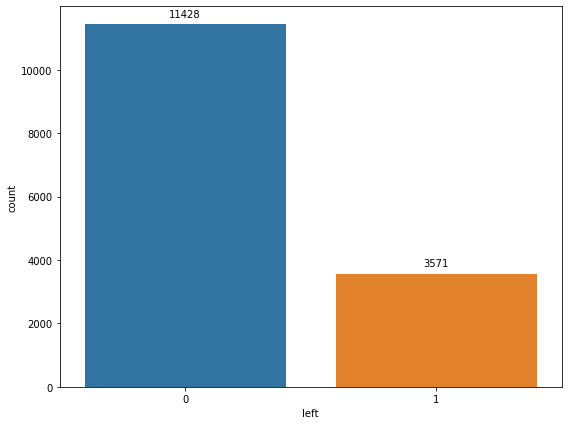

In [10]:
#check how many employees left and how many didn't
plt.figure(figsize=(9,7))
plot = sns.countplot(x='left',data=employee)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [22]:
#Here, you can see out of 14 999 3,571 left, and 11,428 stayed. 
#The no of employee left is 23 % of the total employment.

In [16]:
leave = employee.groupby('left')
leave.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [17]:
# We can see that employees who left the company had low satisfaction level
# had more project assigned to them
# had worked more average hours compared to those who stayes
# and had low salaries

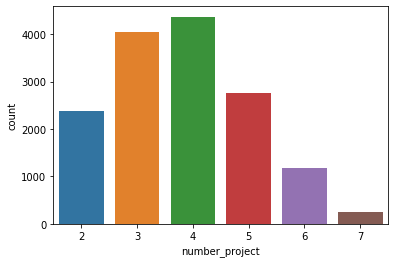

In [25]:
# count the number of employees deployed on How many projects

sns.countplot(x = 'number_project',data = employee)

In [26]:
# Most employees were assigned 3 to 5 projects

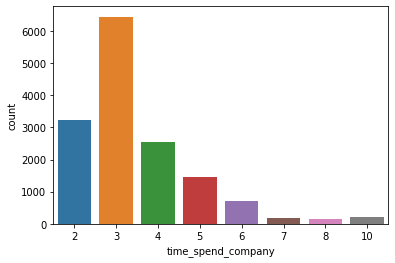

In [27]:
# Check employee experience (time spent in company)
sns.countplot(x='time_spend_company',data=employee)

In [28]:
#Most employees had 2 to 4 years experience

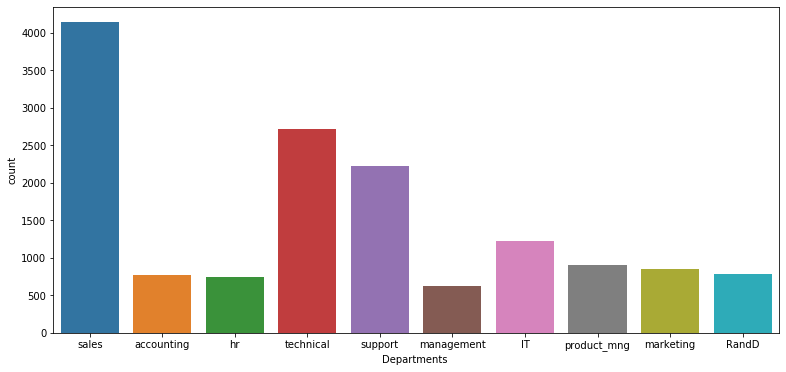

In [52]:
#check departments

plt.figure(figsize=(13,6))
sns.countplot(x='Departments ',data=employee)

In [53]:
# Most employees are in Sales, Technical and Support departments

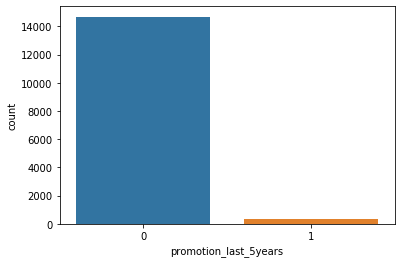

In [29]:
# Check employee promotion

sns.countplot(x='promotion_last_5years',data=employee)

In [30]:
# less number of employees get promotion in the last 5 year

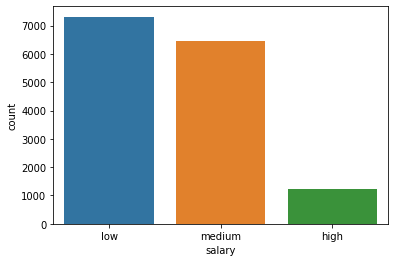

In [32]:
# Check employee salaries
sns.countplot(x='salary',data=employee)

In [33]:
# Most employees are earning from LOW to MEDIUM salaries

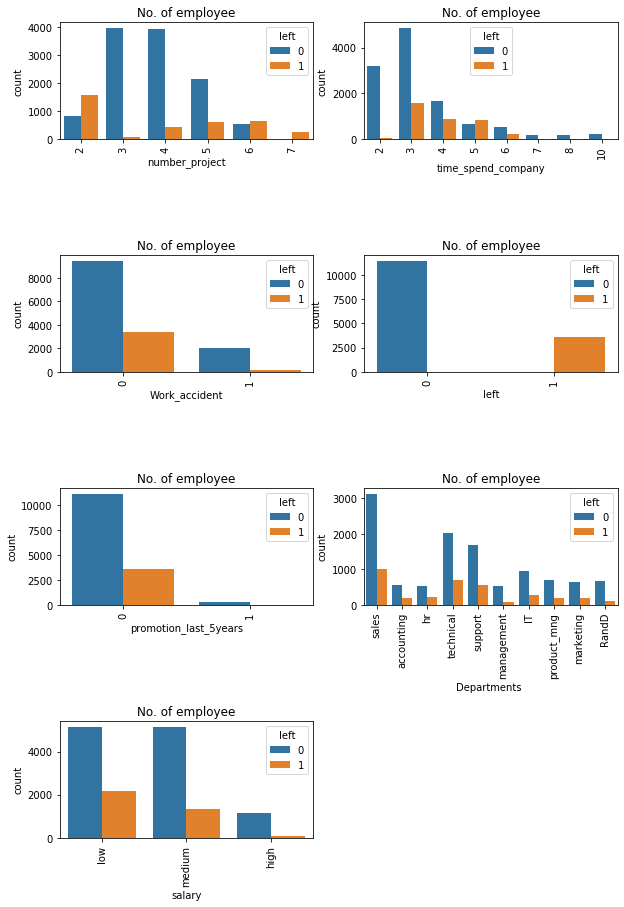

In [34]:
# Check the effect of each feature on 'left'
# also to save time lets plot all plots for each feature at once

features = ['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig = plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = employee, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [35]:
# ------WE observe the following----------
    # Most employees with more than 5 projects left the company. It might be they had large workload
    # Most employees with 3 to 5 years of experience left the company
    # The employee with five-year experience is leaving more because of no promotions in last 5 years
    # and more than 6 years experience are not leaving because of affection with the company.
    # Most employees in Sales, Technical and Support departments left the company
    # Employees with LOW to MEDIUM salaries left the company

In [36]:
# Following features are most influencing a person to leave the company:
   #---- Promotion, Salary, Number of years with Company, Number of projects
    

In [40]:
#--------------------CLUSTER ANALYSIS------------------------

# You can observe that the most important factor for any employee to stay or leave 
#is satisfaction and performance in the company. 
# So let's bunch them in the group of people using cluster analysis.

In [39]:
from sklearn.cluster import KMeans

# Filter data
left_emp =  employee[['satisfaction_level', 'last_evaluation']][employee.left == 1]

# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

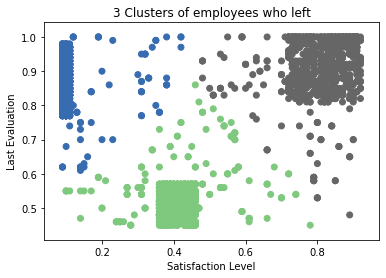

In [41]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

In [42]:
#------------Here, Employee who left the company can be grouped into 3 type of employees:

 # High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
 # Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph),
      #you can also call them Frustrated.
 #Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

In [43]:
#_------------Building Machine Learning Models--------------------

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#split data
from sklearn.model_selection import train_test_split

In [54]:
# First, lets convert categorical features to numerical ones

le = preprocessing.LabelEncoder()
employee['salary'] = le.fit_transform(employee['salary'])
employee['Departments '] = le.fit_transform(employee['Departments '])

In [58]:
# check data again
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [64]:
X = employee.drop('left',axis=1)
y = employee['left']

In [69]:
# NB: random_state is for selecting records randomly
# 70% training and 30% test set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42) 

In [72]:
# Logistic Regression

lm = LogisticRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)*100

76.0

In [75]:
# Gradient Boosting model

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

print("accuracy:",gb.score(X_test,y_test)*100)

accuracy: 97.15555555555555


In [77]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print("accuracy:",rf.score(X_test,y_test)*100)

accuracy: 98.77777777777777


In [90]:
# Precision of a Random Forest Model

y_preds = rf.predict(X_test)
metrics.precision_score(y_test,y_preds)*100

99.22555663117134

In [88]:
# Decision Tree

dt = DecisionTreeClassifier(criterion = 'gini',random_state = 100)
dt.fit(X_train,y_train)
print("accuracy:",dt.score(X_test,y_test)*100)

accuracy: 97.33333333333334


In [91]:
# Neural Network

nnt = MLPClassifier()
nnt.fit(X_train,y_train)
print("accuracy:",nnt.score(X_test,y_test)*100)

accuracy: 92.77777777777779


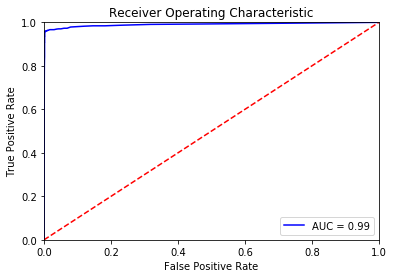

In [97]:
#ROC CURVE FOR THE MODEL
probs = rf.predict_proba(X_test)  #for Random forest
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [98]:
# Ranndom forest performed best compared to other models. It has 98% accuracy, 99% precision and 99% AUC. We select this model

In [99]:
# Precision: 
# Precision is about being precise, i.e., 
# how precise your model is. 
# In other words, you can say, 
# when a model makes a prediction, how often it is correct. In  this case, 
# when Random forest model predicted an employee is going to leave, 
# that employee actually left 99% of the time.

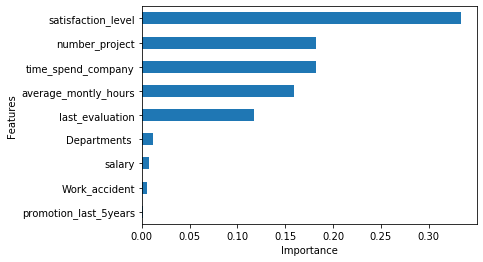

In [105]:
# Now lets get the features identified by the selected model as influencial in employee churn

#Feature importance of the selected model (Random forest)
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(10).plot(kind='barh')
importances = rf.feature_importances_
indices = np.argsort(importances)


plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [106]:
# ---------------------------END--------------------------------------

# As observed earlier, the first 3 fearures identied by the selected model to be important in predicting whether 
# an employee will leave are, satisfaction,number of projects and time spent with company(experience)